In [15]:
import os
import random
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = str(42)

In [16]:
data = load_breast_cancer()

In [17]:
x = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.Series(data.target)

In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.5),
    Dense(8, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

e:\APP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [23]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)

In [24]:
history = model.fit(x_train, y_train, epochs=500, 
                    batch_size=16, validation_split=0.1, verbose=1,
                    callbacks=[early_stopping_callback])

Epoch 1/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4492 - loss: 1.0509 - val_accuracy: 0.6739 - val_loss: 0.6193
Epoch 2/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5711 - loss: 0.7490 - val_accuracy: 0.9348 - val_loss: 0.4895
Epoch 3/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6718 - loss: 0.6686 - val_accuracy: 0.9130 - val_loss: 0.4261
Epoch 4/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6552 - loss: 0.5913 - val_accuracy: 0.9130 - val_loss: 0.3868
Epoch 5/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7546 - loss: 0.5330 - val_accuracy: 0.9130 - val_loss: 0.3504
Epoch 6/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7613 - loss: 0.4750 - val_accuracy: 0.9130 - val_loss: 0.3159
Epoch 7/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7605 - loss: 0.4909 - val_accuracy: 0.9130 - val_loss: 0.2914
Epoch 8/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8143 - loss: 0.4051 - val_accuracy: 0.9130 - v

In [25]:
loss, accuracy = model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9850 - loss: 0.0754 


In [26]:
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 99.12%


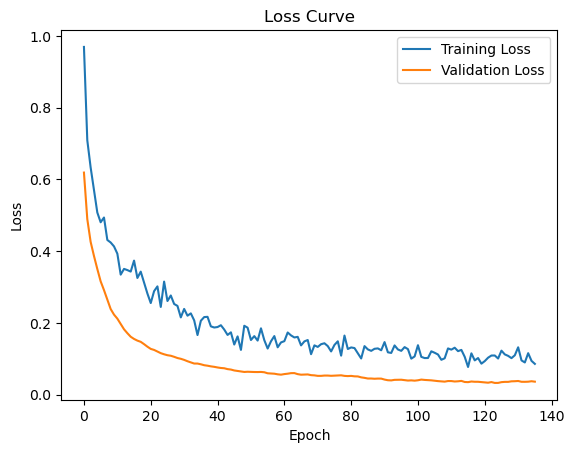

In [27]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

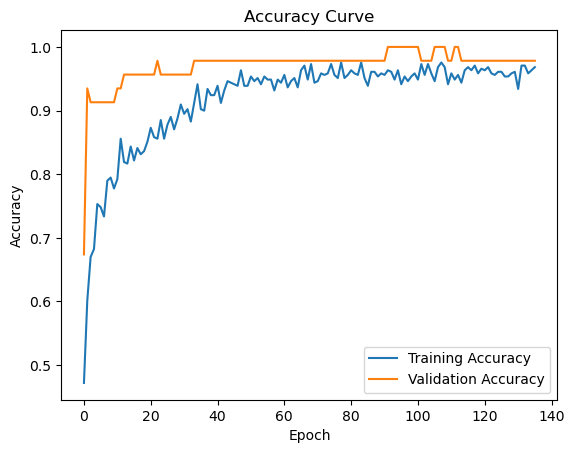

In [28]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()